In [1]:
import pandas as pd
df = pd.read_csv('train_v9rqX0R.csv')

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression()

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
model.fit(df[['Item_MRP']], df['Item_Outlet_Sales'])

LinearRegression()

In [7]:
print('intercept:', model.intercept_)

intercept: -11.575142825170133


In [8]:
print('slope:', model.coef_)

slope: [15.55302354]


In [9]:
item_outlet_sales_pred = model.predict(df[['Item_MRP']])

In [10]:
item_outlet_sales_pred

array([3873.71322408,  739.1568608 , 2191.01294418, ..., 1312.33554775,
       1592.45794404, 1162.16488431])

In [11]:
actual_item_outlet_sales = df['Item_Outlet_Sales']

In [17]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
print('r2 score: ', r2_score(actual_item_outlet_sales, item_outlet_sales_pred))
print('mean squared error: ', mean_squared_error(actual_item_outlet_sales, item_outlet_sales_pred))
print('mean absolute error: ', mean_absolute_error(actual_item_outlet_sales, item_outlet_sales_pred))
print('mean absolute percentage error: ', mean_absolute_percentage_error(actual_item_outlet_sales, item_outlet_sales_pred))
print('sqrt mean squared error:', np.sqrt(mean_squared_error(actual_item_outlet_sales, item_outlet_sales_pred)))

r2 score:  0.3221407524979081
mean squared error:  1973790.0540609627
mean absolute error:  1032.0262957388184
mean absolute percentage error:  143.93268843051817
sqrt mean squared error: 1404.916386857582


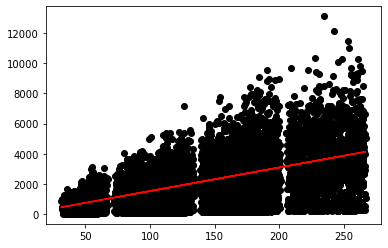

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'], color='black')
plt.plot(df['Item_MRP'], item_outlet_sales_pred, color='red')
plt.show()